<a href="https://colab.research.google.com/github/sobhanshukueian/Object_Detection_Counting_RetinaNet/blob/main/RetinaNet_Pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Clone RetinaNet from github repo
%cd drive/MyDrive/retinanet/
!git clone https://github.com/fizyr/keras-retinanet.git

[Errno 2] No such file or directory: 'drive/MyDrive/retinanet/'
/content/keras-retinanet/keras_retinanet
Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (4201/4201), done.


In [17]:
# Install Cloned Repo
%cd /content/drive/MyDrive/retinanet/keras-retinanet
!pip install .

/content/drive/MyDrive/retinanet/keras-retinanet
Processing /content/drive/MyDrive/retinanet/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168042 sha256=b5232864a32694dea3340d782dafc19eb65bbd779472e4f37828b6d00395b233
  Stored in directory: /root/.cache/pip/wheels/5a/02/54/5d5c5d4e47358d14c888905d0758c7d34cc05a02af72add74c
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20487 sha256=ac421164f33f252ca2baf118cf097d1e5fecb0d55aced4a493d8ec7335a5eac4
  Stored in directory: /root/.cache/pip/wh

In [18]:
# build cython file
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.7/keras_retinanet/utils/compute_overlap.cpython-37m-x86_64-linux-gnu.so -> keras_retinanet/utils


In [19]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import requests
import urllib
import os
from PIL import Image, ImageDraw

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

In [20]:
# Get pretrained RetinaNet Model trained in COCO Dataset you can download other models from https://github.com/fizyr/keras-retinanet/releases
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')

('pretrained_model.h5', <http.client.HTTPMessage at 0x7f05e8b51e90>)

In [21]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y

!pip install tensorflow==2.3.0
!pip install tensorflow_gpu==2.3.0
!pip install keras==2.4

Found existing installation: Keras 2.4.3
Uninstalling Keras-2.4.3:
  Successfully uninstalled Keras-2.4.3
Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Successfully uninstalled keras-nightly-2.5.0.dev2021032900
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.5.0
Uninstalling tensorflow-2.5.0:
  Successfully uninstalled tensorflow-2.5.0
     |████████████████████████████████| 320.4 MB 50 kB/s 
     |████████████████████████████████| 2.9 MB 43.6 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
     |████████████████████████████████| 42 kB 910 kB/s 
     |████████████████████████████████| 459 kB 39.8 MB/s 
  Attempting uninstall: numpy
    Found existin

     |████████████████████████████████| 320.4 MB 44 kB/s 
     |████████████████████████████████| 170 kB 4.7 MB/s 


In [22]:
# load pretrained on coco dataset model
model = models.load_model('pretrained_model.h5')


Using TensorFlow backend.


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.510135 to fit



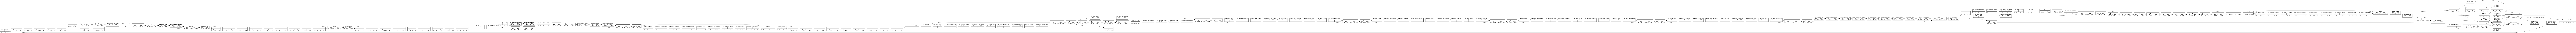

In [35]:
# save model structure in a png file
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, rankdir="LR")

In [23]:
# COCO dataset labels 
class_names = [l.rstrip() for l in open('coco_categories.txt')]
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [30]:
# Perform object detection and counting them 
def detect_count_objects(img_path, threshold=0.6):
  im = np.array(Image.open(img_path))
  print("im.shape:", im.shape)

  # if there's a PNG it will have alpha channel
  im = im[:,:,:3]
  
  ### plot predictions ###

  # get predictions
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(imp, axis=0)
  )


  # standardize box coordinates
  boxes /= scale

  classes = []

  # loop through each prediction for the input image
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can quit as soon
    # as we see a score below threshold
    if score < threshold:
      break

    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = class_names[label]
    classes.append(class_name)
    caption = f"{class_name} {score:.3f}"
    print(caption)
    draw_caption(im, box, caption)

  # create classes and counts dictionary
  classes_count = {i:classes.count(i) for i in classes}

  pil_image=Image.fromarray(im)
  d1 = ImageDraw.Draw(pil_image)
  # Write counts in Image
  d1.text((28, 10), f"***Classes And Their Counts", fill=(255, 255, 255))
  for index, clas_s in enumerate(classes_count):
    d1.text((28, (index + 2) * 10), f"{clas_s} : {classes_count[clas_s]}", fill=(255, 255, 255))

  print(classes_count)
  plt.axis('off')
  plt.imshow(pil_image)
  plt.show()


In [24]:
plt.rcParams['figure.figsize'] = [20, 10]

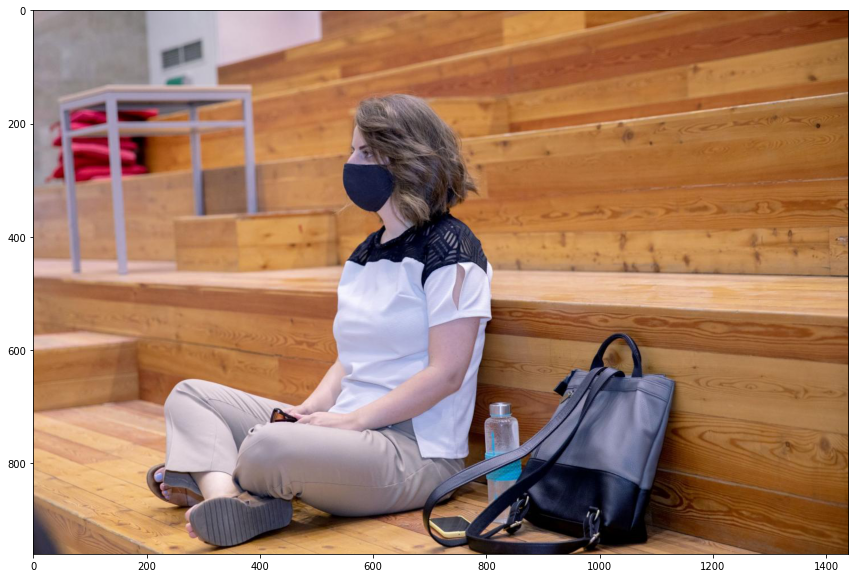

In [28]:
img = mpimg.imread('retina_image1.jpg')
imgplot = plt.imshow(img)
plt.show()

im.shape: (960, 1440, 3)
person 0.981
handbag 0.906
suitcase 0.646
bottle 0.534
{'person': 1, 'handbag': 1, 'suitcase': 1, 'bottle': 1}


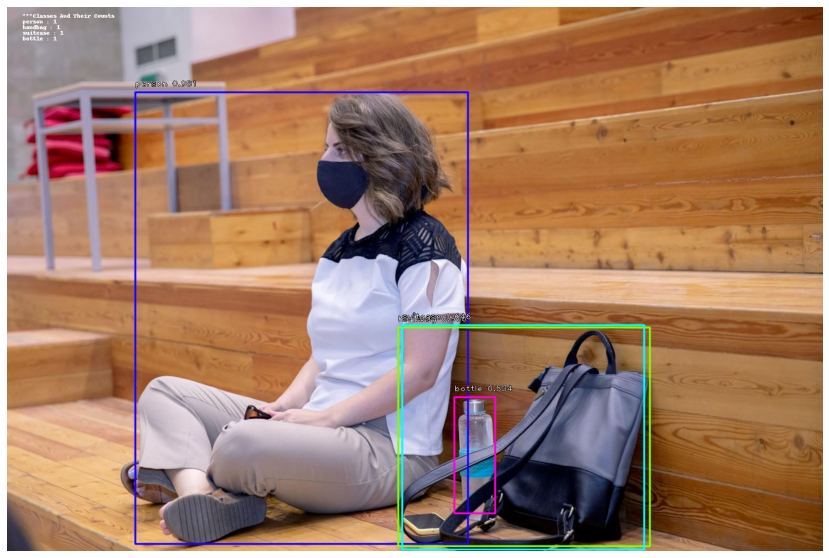

In [32]:
detect_count_objects('retina_image1.jpg', threshold=0.3)

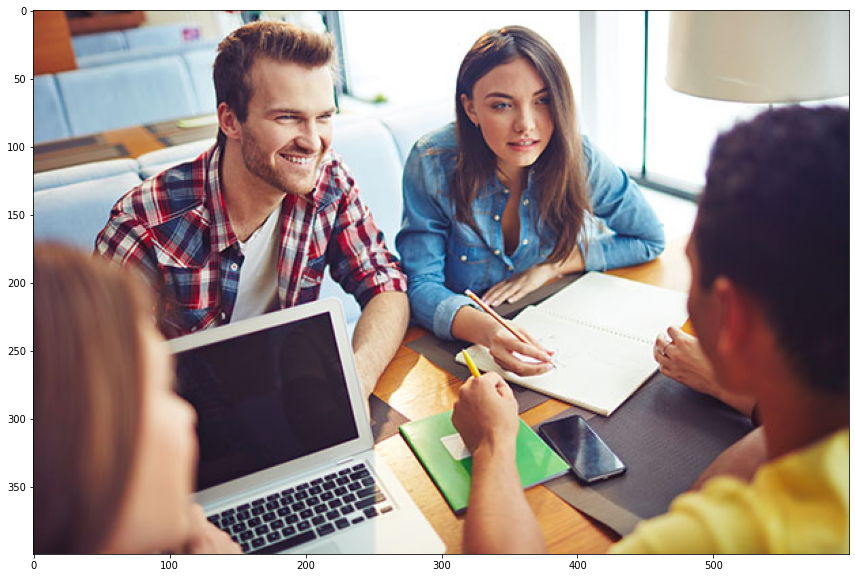

In [36]:
img = mpimg.imread('tech-in-everyday-life.jpg')
imgplot = plt.imshow(img)
plt.show()

im.shape: (400, 600, 3)
person 0.733
laptop 0.721
person 0.594
person 0.556
{'person': 3, 'laptop': 1}


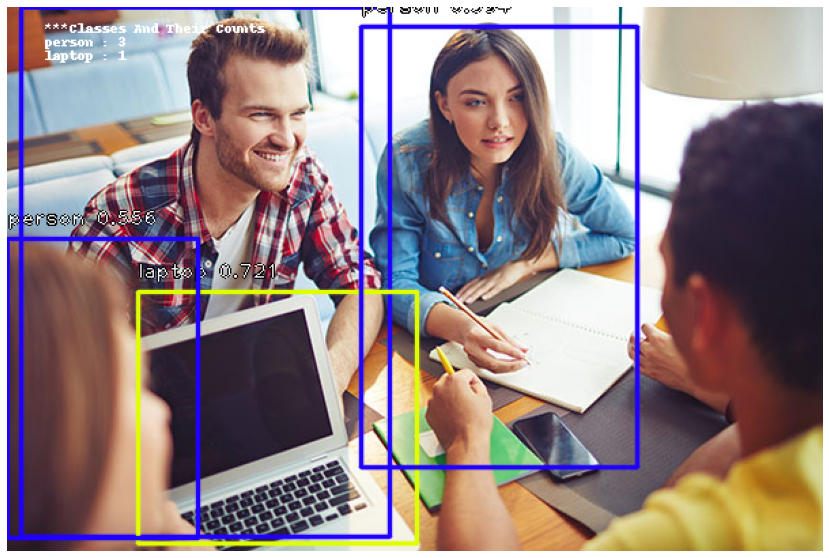

In [42]:
detect_count_objects('tech-in-everyday-life.jpg', threshold= 0.5)

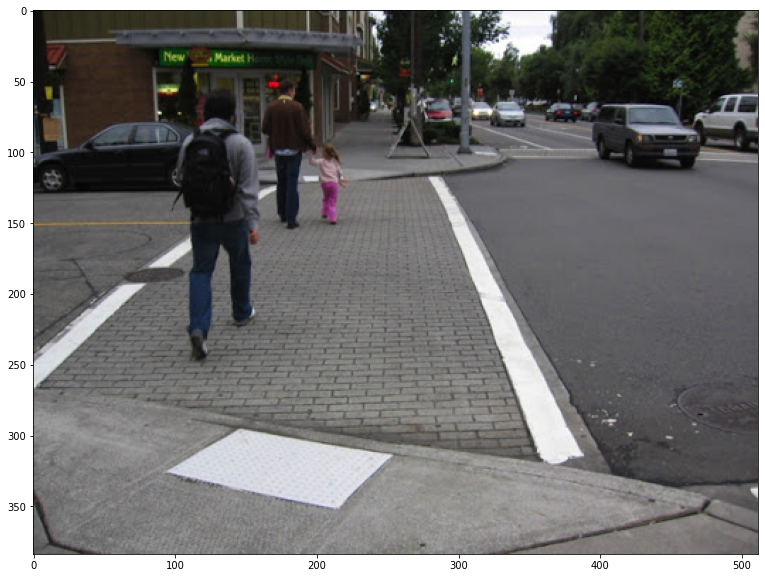

In [38]:
img = mpimg.imread('crosswalk.jpg')
imgplot = plt.imshow(img)
plt.show()

im.shape: (384, 512, 3)
backpack 0.910
car 0.897
person 0.892
car 0.879
person 0.860
car 0.784
car 0.760
car 0.736
car 0.689
person 0.652
car 0.602
{'backpack': 1, 'car': 7, 'person': 3}


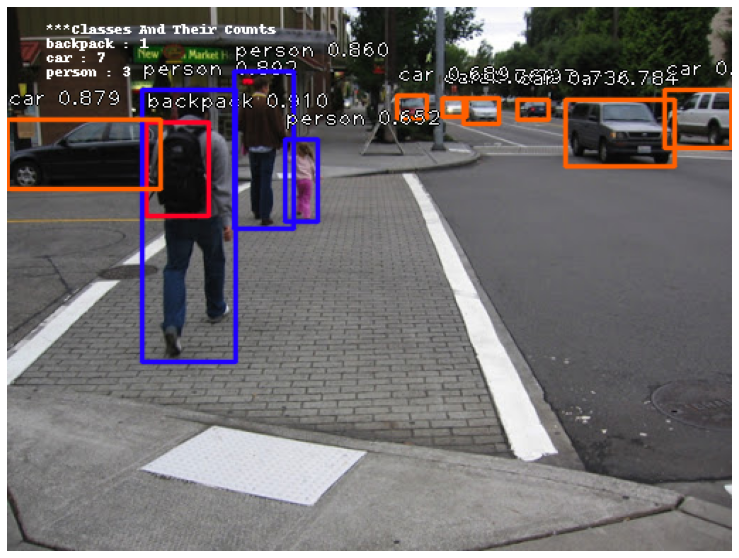

In [ ]:
detect_count_objects('crosswalk.jpg')